# Preprocessing Workflow


🎯 This exercise will take you through the preprocessing workflow. Step by step, feature by feature, you will investigate the dataset and take preprocessing decisions accordingly.

👇 Download the `ML_Houses_dataset.csv` [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv) and save it in the `data` folder as `ML_Houses_dataset.csv`. Then, run the code below to load the dataset and features you will be working with.

In [0]:
import pandas as pd

data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv")

data = data[['GrLivArea','BedroomAbvGr','KitchenAbvGr', 'OverallCond','RoofSurface','GarageFinish','CentralAir','ChimneyStyle','MoSold','SalePrice']].copy()

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,ChimneyStyle,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,bricks,2,208500
1,1262,3,1,8,874.0,RFn,Y,bricks,5,181500
2,1786,3,1,5,1593.0,RFn,Y,castiron,9,223500
3,1717,3,1,5,2566.0,Unf,Y,castiron,2,140000
4,2198,4,1,5,3130.0,RFn,Y,bricks,12,250000


👉 Take the time to do a preliminary investigation of the features by reading the dataset description available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt). Make sure to use refer to it throughout the day.

# Duplicates

ℹ️ Duplicates in datasets can cause data leakage. It is important to locate and remove any meaningless duplicates.

❓ How many duplicated rows are there in the dataset? Save your answer under variable name `duplicate_count`.

In [0]:
duplicate_count = len(data)-len(data.drop_duplicates()) # Original data lenght minus data length without duplicates

duplicate_count

300

👇 Remove the duplicates from the dataset. Overwite the dataframe `data`.

In [0]:
data.drop_duplicates(inplace=True) # Drop duplicates in place

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,ChimneyStyle,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,bricks,2,208500
1,1262,3,1,8,874.0,RFn,Y,bricks,5,181500
2,1786,3,1,5,1593.0,RFn,Y,castiron,9,223500
3,1717,3,1,5,2566.0,Unf,Y,castiron,2,140000
4,2198,4,1,5,3130.0,RFn,Y,bricks,12,250000


### ☑️ Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('duplicates',
                         duplicates = duplicate_count,
                         dataset = data
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.7.7, pytest-5.4.3, py-1.9.0, pluggy-0.13.1 -- /Users/chriswesterman/.pyenv/versions/3.7.7/envs/lewagon/bin/python3.7
cachedir: .pytest_cache
rootdir: /Users/chriswesterman/code/cjw21889/le-wagon/lw-data-solutions/05-ML/02-Prepare-the-dataset/01-Preprocessing-Workflow
plugins: anyio-2.2.0
collecting ... collected 2 items

tests/test_duplicates.py::TestDuplicates::test_dataset_length PASSED     [ 50%]
tests/test_duplicates.py::TestDuplicates::test_duplicate_count PASSED    [100%]

============================== 2 passed in 0.26s ===============================


💯 You can commit your code:

git add tests/duplicates.pickle

git commit -m 'Completed duplicates step'

git push origin master


# Missing data

👇 Print out the percentage of missing values for all columns of the dataframe.

In [0]:
data.isnull().sum().sort_values(ascending=False)/len(data) #NaN percentage for each column

GarageFinish    0.055479
RoofSurface     0.006164
GrLivArea       0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
OverallCond     0.000000
CentralAir      0.000000
ChimneyStyle    0.000000
MoSold          0.000000
SalePrice       0.000000
dtype: float64

## `GarageFinish`

👇 Investigate the missing values in `GarageFinish`. Then, chose one of the following solutions:

1. Drop the column entirely
2. Impute the column median using Sklearn's `SimpleImputer`
3. Preserve the NaNs and replace by actual meaning

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 Hint</summary>
ℹ️ According to the dataset description, the missing values in `GarageFinish` represent a house having no garage. They need to be encoded as such.
</details>

In [0]:
import numpy as np

data.GarageFinish.replace(np.nan, "NoGarage", inplace=True) #Replace NaN by "NoGarage"

## `RoofSurface`

👇 Investigate the missing values in `RoofSurface`. Then, chose one of the following solutions:

1. Drop the column entirely
2. Impute the column median using Sklearn's `SimpleImputer`
3. Preserve the NaNs and replace by actual meaning

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 Hint</summary>
ℹ️ `RoofSurface` has a few missing values that can be imputed by the median value.
</details>

In [0]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") # Instanciate a SimpleImputer object with strategy of choice

imputer.fit(data[['RoofSurface']]) # Call the "fit" method on the object

data['RoofSurface'] = imputer.transform(data[['RoofSurface']]) # Call the "transform" method on the object

👇 When you are done, print out the percentage of missing values for the entire dataframe.

In [0]:
data.isnull().sum().sort_values(ascending=False)/len(data) #NaN percentage for each column

GrLivArea       0.0
BedroomAbvGr    0.0
KitchenAbvGr    0.0
OverallCond     0.0
RoofSurface     0.0
GarageFinish    0.0
CentralAir      0.0
ChimneyStyle    0.0
MoSold          0.0
SalePrice       0.0
dtype: float64

⚠️ Be careful: not all missing values are represented `np.nans`, and python's `isnull()` only detects `np.nans` ⚠️

## `ChimneyStyle`

👇 Investigate the missing values in `ChimneyStyle`. Then, chose one of the following solutions:

1. Drop the column entirely
2. Impute the column median
3. Preserve the NaNs and replace by actual meaning

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 Hint</summary>
ℹ️ `ChimneyStyle` has a lot of missing values. The description does not touch on what they represent. As such, it is better not to make any assumptions and to drop the column entirely.
</details>

In [0]:
data.ChimneyStyle.unique() # Get unique values for column

data.ChimneyStyle.replace("?",np.nan, inplace=True) # Replace "?" by np.nan

data.ChimneyStyle.isnull().sum()/len(data) # NaN percentage for Chimney Style

data.drop(columns='ChimneyStyle', inplace=True) # Drop ChimneyStyle column 

### ☑️ Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = data
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.7.7, pytest-5.4.3, py-1.9.0, pluggy-0.13.1 -- /Users/chriswesterman/.pyenv/versions/3.7.7/envs/lewagon/bin/python3.7
cachedir: .pytest_cache
rootdir: /Users/chriswesterman/code/cjw21889/le-wagon/lw-data-solutions/05-ML/02-Prepare-the-dataset/01-Preprocessing-Workflow
plugins: anyio-2.2.0
collecting ... collected 2 items

tests/test_missing_values.py::TestMissing_values::test_nans PASSED       [ 50%]
tests/test_missing_values.py::TestMissing_values::test_number_of_columns PASSED [100%]

============================== 2 passed in 0.25s ===============================


💯 You can commit your code:

git add tests/missing_values.pickle

git commit -m 'Completed missing_values step'

git push origin master


# Scaling

##  `RoofSurface` 

👇 Investigate `RoofSurface` for distribution and outliers. Then, choose the most appropriate scaling technique. Either:

1. Standard Scale
2. Robust Scale
3. MinMax Scale

Replace the original columns by the transformed values.

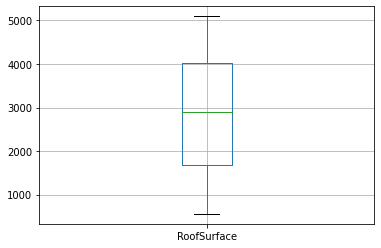

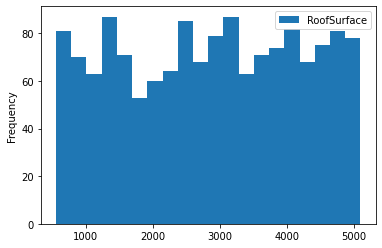

In [0]:
data[['RoofSurface']].boxplot()
data[['RoofSurface']].plot.hist(bins=20)

<details>
    <summary>💡 Hint</summary>
ℹ️ Since `RoofSurface` does not seem to have a normal distribution, it is better to MinMax scale.
</details>

In [0]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()

data['RoofSurface']= minmaxscaler.fit_transform(data[['RoofSurface']])

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,1710,3,1,5,0.316729,RFn,Y,2,208500
1,1262,3,1,8,0.069650,RFn,Y,5,181500
2,1786,3,1,5,0.228124,RFn,Y,9,223500
3,1717,3,1,5,0.442583,Unf,Y,2,140000
4,2198,4,1,5,0.566894,RFn,Y,12,250000


## `GrLivArea`

👇 Investigate `GrLivArea` for distribution and outliers. Then, choose the most appropriate scaling technique. Either:

1. Standard Scale
2. Robust Scale
3. MinMax Scale

Replace the original columns by the transformed values.

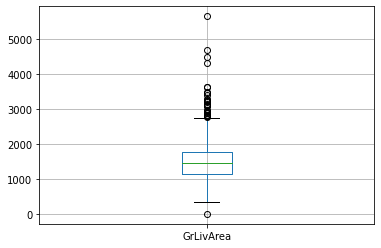

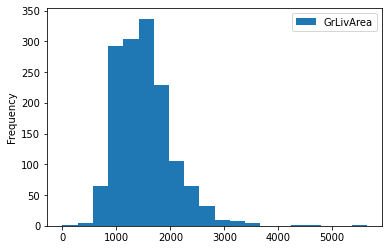

In [0]:
data[['GrLivArea']].boxplot()
data[['GrLivArea']].plot.hist(bins=20)

<details>
    <summary>💡 Hint</summary>
ℹ️ `GrLivArea` has a normal distribution, and some outliers. It needs to be Robust scaled.
</details>

In [0]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()

data['GrLivArea'] = rb_scaler.fit_transform(data[['GrLivArea']])

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,0.380070,3,1,5,0.316729,RFn,Y,2,208500
1,-0.312090,3,1,8,0.069650,RFn,Y,5,181500
2,0.497489,3,1,5,0.228124,RFn,Y,9,223500
3,0.390885,3,1,5,0.442583,Unf,Y,2,140000
4,1.134029,4,1,5,0.566894,RFn,Y,12,250000


## `BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr`

👇 Investigate `BedroomAbvGr`, `OverallCond` & `KitchenAbvGr`. Then, chose one of the following scaling techniques:

1. MinMax Scale
2. Standard Scale
3. Robust Scale

Replace the original columns by the transformed values.

<details>
    <summary>💡 Hint</summary>
ℹ️ `BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr` are ordinal features that can be MinMax scaled.
</details>

In [0]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler_2 = MinMaxScaler()

data['BedroomAbvGr'], data['OverallCond'], data['KitchenAbvGr'] =  minmaxscaler_2.fit_transform(data[['BedroomAbvGr','OverallCond','KitchenAbvGr']]).T

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,0.380070,0.375,0.333333,0.500,0.316729,RFn,Y,2,208500
1,-0.312090,0.375,0.333333,0.875,0.069650,RFn,Y,5,181500
2,0.497489,0.375,0.333333,0.500,0.228124,RFn,Y,9,223500
3,0.390885,0.375,0.333333,0.500,0.442583,Unf,Y,2,140000
4,1.134029,0.500,0.333333,0.500,0.566894,RFn,Y,12,250000


### ☑️ Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = data
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.7.7, pytest-5.4.3, py-1.9.0, pluggy-0.13.1 -- /Users/chriswesterman/.pyenv/versions/3.7.7/envs/lewagon/bin/python3.7
cachedir: .pytest_cache
rootdir: /Users/chriswesterman/code/cjw21889/le-wagon/lw-data-solutions/05-ML/02-Prepare-the-dataset/01-Preprocessing-Workflow
plugins: anyio-2.2.0
collecting ... collected 3 items

tests/test_scaling.py::TestScaling::test_bedroom_kitchen_condition PASSED [ 33%]
tests/test_scaling.py::TestScaling::test_gr_liv_area PASSED              [ 66%]
tests/test_scaling.py::TestScaling::test_roof_surface PASSED             [100%]

============================== 3 passed in 0.29s ===============================


💯 You can commit your code:

git add tests/scaling.pickle

git commit -m 'Completed scaling step'

git push origin master


# Feature Engineering

## `GarageFinish`

👇 Investigate `GarageFinish` and chose one of the following encoding techniques accordingly:
- Ordinal encoding
- One-Hot encoding

Add the encoding to the dataframe as new colum(s), and remove the original column.


<details>
    <summary>💡 Hint</summary>
ℹ️ `GarageFinish` is a multicategorical feature that must be One hot encoded.
</details>

In [0]:
from sklearn.preprocessing import OneHotEncoder

data.GarageFinish.unique() # Check unique categories in GarageFinish

GarageFinish_ohe = OneHotEncoder(sparse=False) # Instanciate One hot encoder

GarageFinish_ohe.fit(data[['GarageFinish']]) # Fit one hot encoder

GarageFinish_ohe.categories_ # View categories of GarageFinish

data['Fin'],data['NoGarage'],data['RFn'],data['Unf']  = GarageFinish_ohe.fit_transform(data[['GarageFinish']]).T # Put encoded columns back in dataframe

data.drop(columns=['GarageFinish'], inplace = True) # Drop original column

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,MoSold,SalePrice,Fin,NoGarage,RFn,Unf
0,0.380070,0.375,0.333333,0.500,0.316729,Y,2,208500,0.0,0.0,1.0,0.0
1,-0.312090,0.375,0.333333,0.875,0.069650,Y,5,181500,0.0,0.0,1.0,0.0
2,0.497489,0.375,0.333333,0.500,0.228124,Y,9,223500,0.0,0.0,1.0,0.0
3,0.390885,0.375,0.333333,0.500,0.442583,Y,2,140000,0.0,0.0,0.0,1.0
4,1.134029,0.500,0.333333,0.500,0.566894,Y,12,250000,0.0,0.0,1.0,0.0


## Encoding  `CentralAir`

👇 Investigate `CentralAir` and chose one of the following encoding techniques accordingly:
- Ordinal encoding
- One-Hot encoding

Replace the original column by the encoding.


<details>
    <summary>💡 Hint</summary>
ℹ️ `CentralAir` is a binary categorical feature.
</details>

In [0]:
data.CentralAir.unique() # Check unique values of CentralAir

CentralAir_encoder = OneHotEncoder(sparse=False, drop='if_binary', categories=[['N', 'Y']]) # Instanciate encoder

data['CentralAir'] = CentralAir_encoder.fit_transform(data[['CentralAir']]) # Fit encoder and tranform

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,MoSold,SalePrice,Fin,NoGarage,RFn,Unf
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,2,208500,0.0,0.0,1.0,0.0
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,5,181500,0.0,0.0,1.0,0.0
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,9,223500,0.0,0.0,1.0,0.0
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,2,140000,0.0,0.0,0.0,1.0
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,12,250000,0.0,0.0,1.0,0.0


## `MoSold` - Cyclical engineering 

Data can be continuous, discrete, categorical, ordinal, but it can also be cyclical. Temporal data is a prime example of that: months, days, minutes. Such data needs specific preprocessing for Machine Learning models to understand and consider its cyclical nature.

Consider the feature `MoSold`, the month on which the house was sold. If left as is, a model would not understand that after 12 (December) comes 1 (January). It would only consider the values on a linear scale.

👇 Do your own investigation on how to preprocess cyclical features in Machine Learning. Then, transform `MoSold` according to your findings.

⚠️ Replace the original column by the new features.

<details>
    <summary>💡 Hint</summary>
ℹ️ This <a href='https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time' target='blank'>article</a> explains how to deal with cyclical features.
    
</details>

**❓ How would you name these 2 new features?**

Let's add two new columns to your data frame, `sin_MoSold` and `cos_MoSold`, containing the sine and cosine of the `MoSold` column respectively.  Once these columns are added we can drop the original `MoSold` column.

In [0]:
data['sin_MoSold'] = np.sin(2*np.pi*data.MoSold/12)
data['cos_MoSold'] = np.cos(2*np.pi*data.MoSold/12)
data.drop(columns=['MoSold'], inplace=True)

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,Fin,NoGarage,RFn,Unf,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,0.0,1.0,0.0,8.660254e-01,5.000000e-01
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,0.0,1.0,0.0,5.000000e-01,-8.660254e-01
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,0.0,1.0,0.0,-1.000000e+00,-1.836970e-16
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,0.0,1.0,8.660254e-01,5.000000e-01
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,0.0,1.0,0.0,-2.449294e-16,1.000000e+00


### ☑️ Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('encoding', dataset = data, new_features = ['sin_MoSold', 'cos_MoSold'])

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.7.7, pytest-5.4.3, py-1.9.0, pluggy-0.13.1 -- /Users/chriswesterman/.pyenv/versions/3.7.7/envs/lewagon/bin/python3.7
cachedir: .pytest_cache
rootdir: /Users/chriswesterman/code/cjw21889/le-wagon/lw-data-solutions/05-ML/02-Prepare-the-dataset/01-Preprocessing-Workflow
plugins: anyio-2.2.0
collecting ... collected 4 items

tests/test_encoding.py::TestEncoding::test_central_air PASSED            [ 25%]
tests/test_encoding.py::TestEncoding::test_columns PASSED                [ 50%]
tests/test_encoding.py::TestEncoding::test_month_sold_features PASSED    [ 75%]
tests/test_encoding.py::TestEncoding::test_month_sold_features_number PASSED [100%]

============================== 4 passed in 0.26s ===============================


💯 You can commit your code:

git add tests/encoding.pickle

git commit -m 'Completed encoding step'

git push origin master


# Export the dataset

👇 Now that the dataset has been preprocessed, execute the code below to export it. You will keep working on it in the next exercise.

In [0]:
data.to_csv("../02-Feature-Selection/data/clean_dataset.csv", index=False)

# 🏁